# 1. Load the Dataset

We use TensorFlow/Keras’s built-in MNIST dataset containing 60,000 training and 10,000 test grayscale images (28×28 pixels)

In [ ]:
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 2. Preprocessing

We prepare the data by normalizing pixel values, flattening the 2D images into vectors, and converting labels into one-hot encoded format for classification.

# a. Normalize the data

In [ ]:
# Scale pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0


# b. Flatten the images (if using Dense layers)

In [ ]:
# Each image is 28x28; we flatten it to 784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


# c. Convert labels to one-hot encoded

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# 3. Build the Model

We define a deep neural network with:

3 hidden layers

Batch normalization (to stabilize and speed up training)

Dropout (to reduce overfitting)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),

    Dense(10, activation='softmax')  # 10 output classes for digits 0–9
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 4. Compile and Train the Model

Compile the model with adam optimizer and categorical_crossentropy loss. Then, we train it for 15 epochs using a 20% validation split.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train with validation split and save training history
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=15,
                    batch_size=128,
                    verbose=2)


Epoch 1/15
375/375 - 7s - 19ms/step - accuracy: 0.8802 - loss: 0.3876 - val_accuracy: 0.9565 - val_loss: 0.1475
Epoch 2/15
375/375 - 4s - 11ms/step - accuracy: 0.9453 - loss: 0.1783 - val_accuracy: 0.9625 - val_loss: 0.1169
Epoch 3/15
375/375 - 6s - 16ms/step - accuracy: 0.9584 - loss: 0.1360 - val_accuracy: 0.9683 - val_loss: 0.1034
Epoch 4/15
375/375 - 6s - 15ms/step - accuracy: 0.9628 - loss: 0.1191 - val_accuracy: 0.9699 - val_loss: 0.1049
Epoch 5/15
375/375 - 4s - 10ms/step - accuracy: 0.9675 - loss: 0.1042 - val_accuracy: 0.9732 - val_loss: 0.0902
Epoch 6/15
375/375 - 5s - 13ms/step - accuracy: 0.9712 - loss: 0.0922 - val_accuracy: 0.9758 - val_loss: 0.0830
Epoch 7/15
375/375 - 4s - 10ms/step - accuracy: 0.9732 - loss: 0.0819 - val_accuracy: 0.9748 - val_loss: 0.0861
Epoch 8/15
375/375 - 6s - 16ms/step - accuracy: 0.9760 - loss: 0.0771 - val_accuracy: 0.9738 - val_loss: 0.0841
Epoch 9/15
375/375 - 6s - 15ms/step - accuracy: 0.9780 - loss: 0.0697 - val_accuracy: 0.9773 - val_loss:

# 5. Visualize Training and Validation Metrics

visualize training and validation accuracy/loss to see how well the model is learning and whether it's overfitting or underfitting

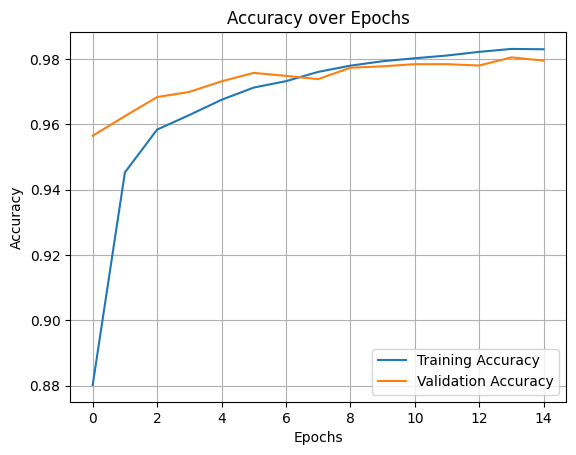

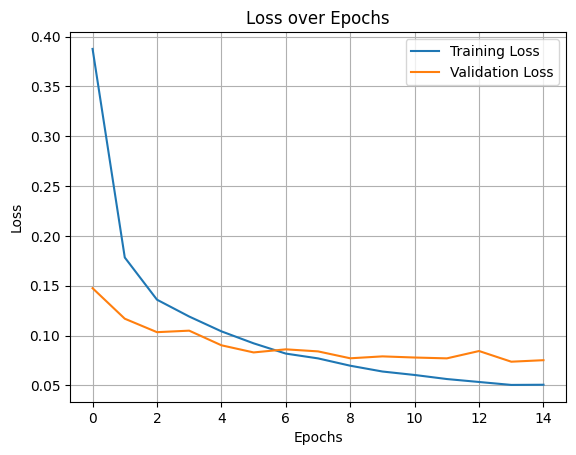

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# 6. Evaluate on the Test Set

 test our model on unseen data to evaluate generalization performance

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')


Test Accuracy: 0.9819
